<a href="https://colab.research.google.com/github/bioqu/bioqu/blob/main/Semana10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Aplicación

Se requiere evaluar la viabilidad de utilizar imágenes previamente capturadas en los estanques del criadero para estimar el peso de los peces. El propósito principal de este proyecto es realizar predicciones precisas del peso de los peces utilizando ciertas medidas relacionadas.

Para llevar a cabo este proyecto, contamos con los datos recopilados en el archivo "Peces.xlsx", el cual contiene información de 7 especies (Brema, Rutilo, Pescado Blanco, Parkki, Perca, Lucio y Capellán). En total, se dispone de 161 registros. Nuestro objetivo es desarrollar un modelo que sea altamente preciso y que contribuya a optimizar el cultivo de peces

Las variables presentes en el archivo "Peces.xlsx" son:

**Especie:** Nombre de la especie del pez.

**Peso:** Peso del pez en gramos

**Longitud1:** longitud vertical en cm

**Longitud2:** longitud de la diagonal en cm

**Longitud3:** Longitud de la cruz en cm

**Altura:** Altura en cm

**Ancho:** Ancho de la diagonal en cm

Estas variables nos servirán como posibles predictores para estimar el peso de los peces y mejorar el sistema de monitoreo y producción del criadero.

Algunas de las preguntas que debemos responder son:

  1) De las variables consideradas, ¿cuál presenta una mejor relación lineal con el peso? Seleccioné el mejor modelo.

  2) ¿Cuál es el cambio en el peso corporal por cada incremento de 5 unidades en el mejor predictor?

  3) Sobre los residuos del modelo seleccionado, que puede comentar sobre las condiciones de normalidad, homocedasticidad?

  4) Crear un modelo de regresión múltiple considerando al menos dos variables al modelo, no olvide analizar los residuos.


Cargamos las librerías

In [ ]:
## Importamos las librerías
# Librerías básicas 
import pandas as pd
import numpy as np
import scipy.stats as ss
# Librerías para Gráficos 
import matplotlib.pyplot as plt
import seaborn as sns
# Librerías para crear modelos de regresión 
import statsmodels.formula.api as smf
import statsmodels.api as sm
# Librería para omitir un aviso recurrente
import warnings 
warnings.filterwarnings("ignore")

In [ ]:
# Instalación de paquetes
!pip install pingouin
!pip install distfit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pingouin as pg
from distfit import distfit

In [ ]:
# Cargamos la base de datos Peces.xlsx
database=pd.read_excel('Peces.xlsx')
database.head()

,Especie,Peso,Longitud1,Longitud2,Longitud3,Alto,Ancho
0,Brema,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Brema,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Brema,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Brema,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Brema,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Información general de la base de datos 
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Especie    161 non-null    object 
 1   Peso       160 non-null    float64
 2   Longitud1  161 non-null    float64
 3   Longitud2  161 non-null    float64
 4   Longitud3  161 non-null    float64
 5   Alto       160 non-null    float64
 6   Ancho      160 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.9+ KB


### Limpieza de los datos o Data Cleaning

In [ ]:
# Mantenemos la base original y trabajamos sobre una copia
data=database.copy()
data.head()

,Especie,Peso,Longitud1,Longitud2,Longitud3,Alto,Ancho
0,Brema,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Brema,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Brema,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Brema,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Brema,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
# Limpiamos la data, eliminando los datos nulos
# Eliminar las filas con casillas vacias
data=data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 0 to 160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Especie    158 non-null    object 
 1   Peso       158 non-null    float64
 2   Longitud1  158 non-null    float64
 3   Longitud2  158 non-null    float64
 4   Longitud3  158 non-null    float64
 5   Alto       158 non-null    float64
 6   Ancho      158 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.9+ KB


In [ ]:
# Estudio descriptivo básico
data.describe()

,Peso,Longitud1,Longitud2,Longitud3,Alto,Ancho
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,393.885443,26.166456,28.329747,31.142405,8.946758,4.401973
std,354.695502,9.976115,10.695249,11.597849,4.288893,1.679742
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.025000,21.000000,23.125000,5.940600,3.380625
50%,272.500000,25.100000,27.150000,29.350000,7.733000,4.248050
75%,642.500000,32.650000,35.000000,39.575000,12.248700,5.577375
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [ ]:
# Borramos de la data la fila que contiene el peso que toma valor 0
data=data.drop(data[data['Peso']==0].index)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Especie    157 non-null    object 
 1   Peso       157 non-null    float64
 2   Longitud1  157 non-null    float64
 3   Longitud2  157 non-null    float64
 4   Longitud3  157 non-null    float64
 5   Alto       157 non-null    float64
 6   Ancho      157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


## Variable categórica (Especie)

<function matplotlib.pyplot.show(close=None, block=None)>

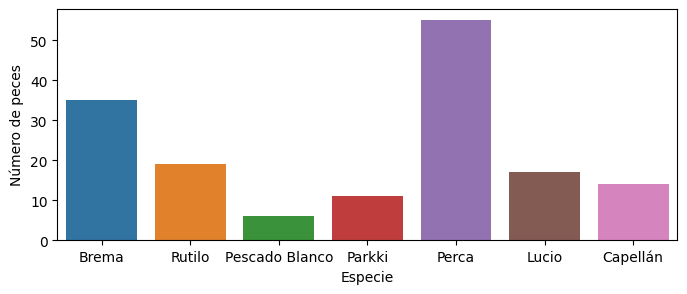

In [ ]:
# Gráfico de barras de la variable 'Especie'
plt.figure(figsize=(8,3))
sns.countplot(data=data, x='Especie')
plt.ylabel('Número de peces')
plt.show

## Estudio de la variable de interés (Peso)

<function matplotlib.pyplot.show(close=None, block=None)>

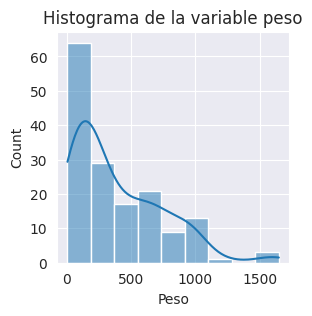

In [ ]:
# Histograma de la variable peso
sns.set_style('darkgrid')
plt.figure(figsize=(3,3))
sns.histplot(data=data, x='Peso', kde=True)
plt.title('Histograma de la variable peso')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

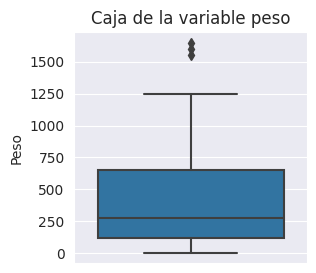

In [ ]:
# Diagrama de caja de la variable peso
sns.set_style('darkgrid')
plt.figure(figsize=(3,3))
sns.boxplot(data=data, y='Peso')
plt.title('Caja de la variable peso')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

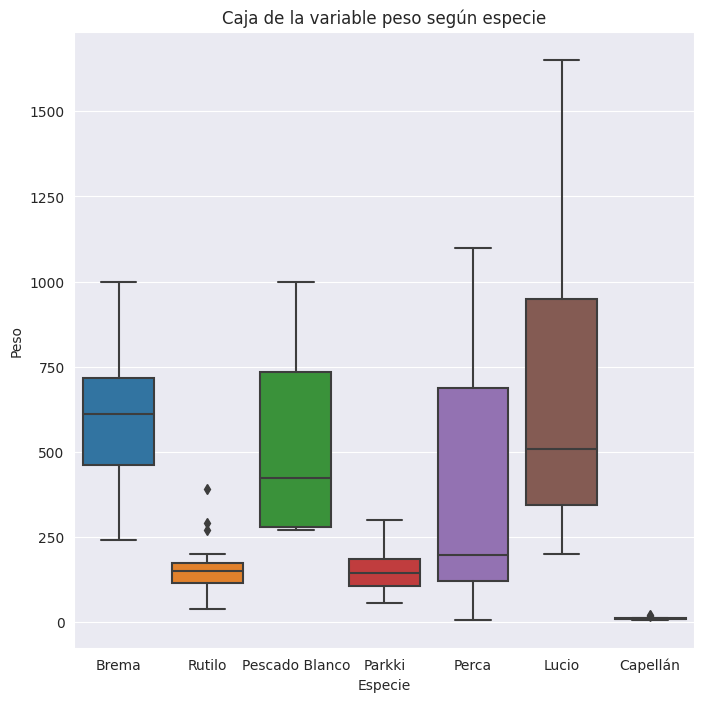

In [ ]:
# Diagrama de caja del peso según especie 
sns.set_style('darkgrid')
plt.figure(figsize=(8,8))
sns.boxplot(data=data, y='Peso', x='Especie')
plt.title('Caja de la variable peso según especie')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

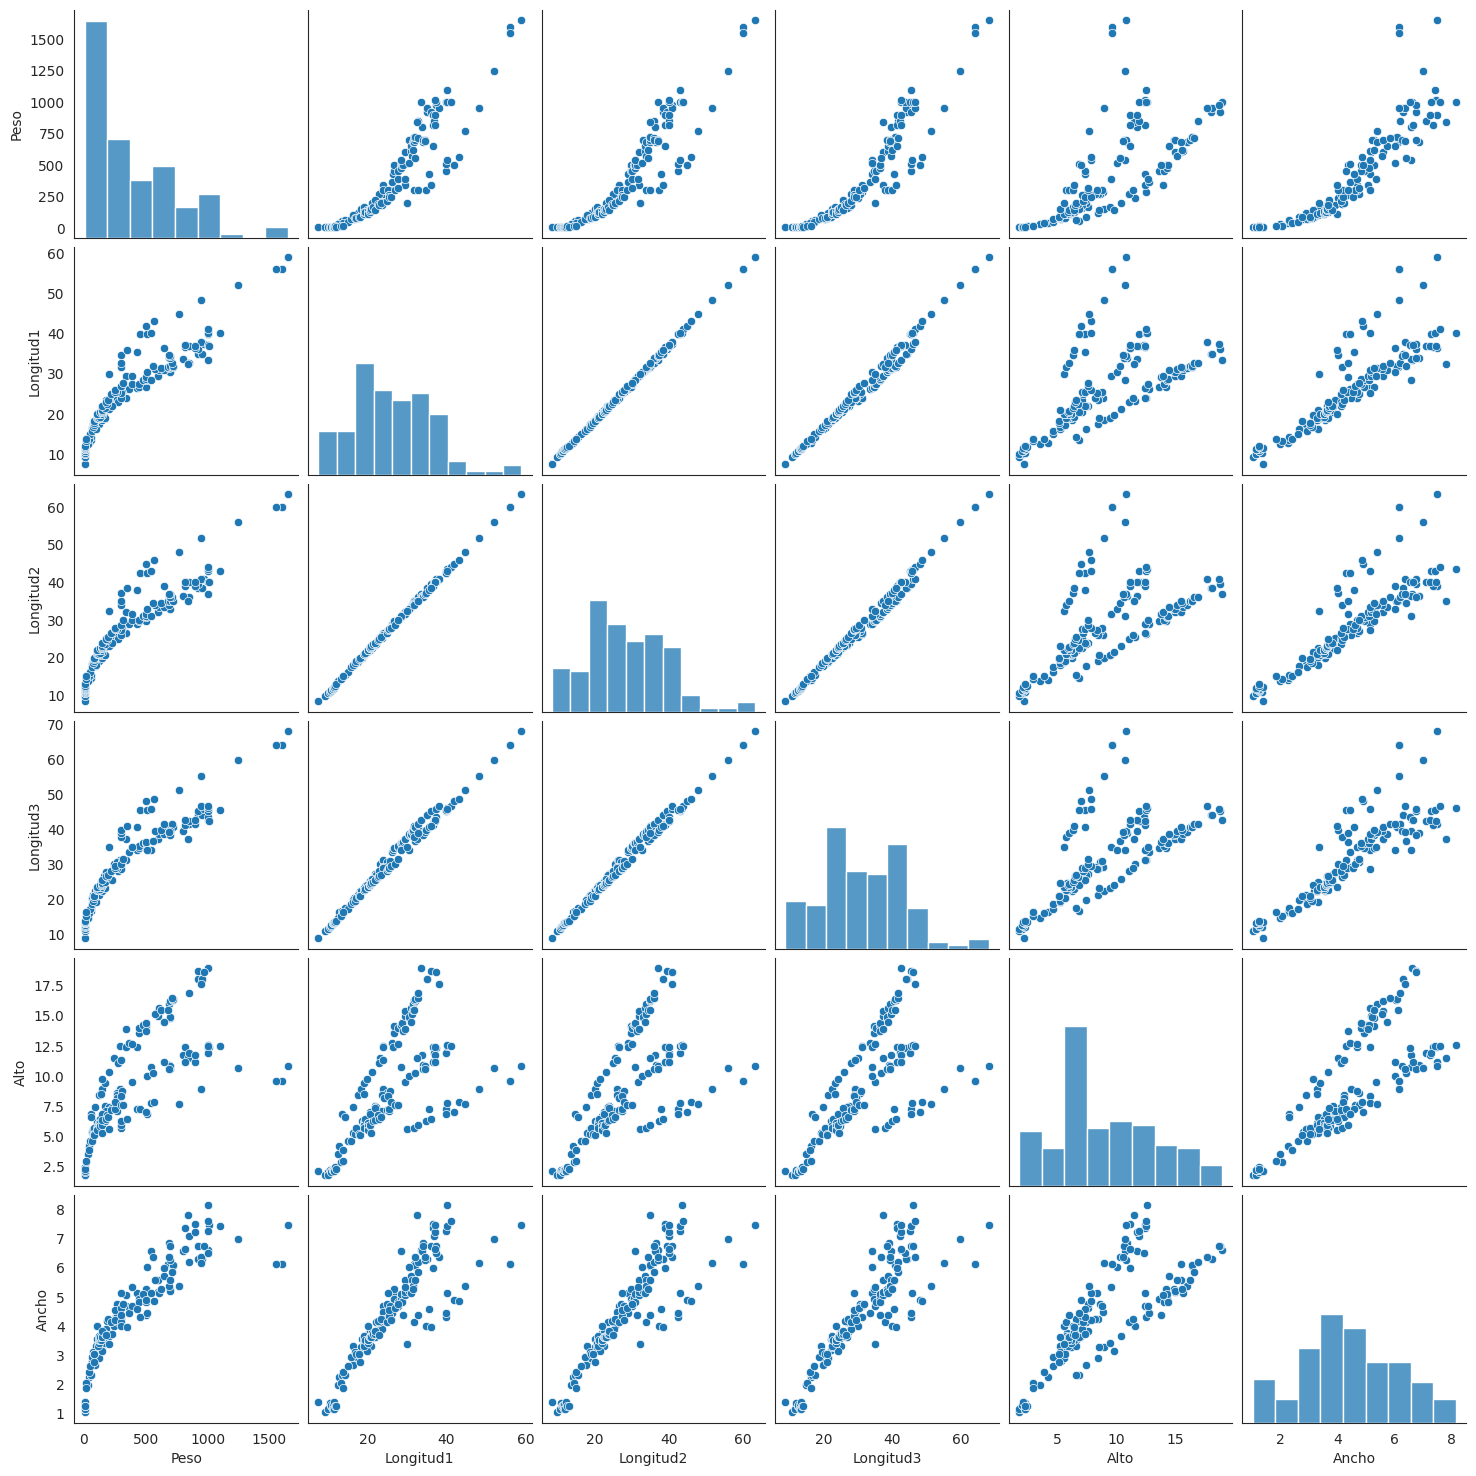

In [ ]:
# Diagrama de nubes
sns.set_style('white')
sns.pairplot(data)
plt.show

In [ ]:
# Filtramos la data
data0=data[['Especie', 'Peso', 'Longitud1', 'Alto', 'Ancho']]
data0.head()

,Especie,Peso,Longitud1,Alto,Ancho
0,Brema,242.0,23.2,11.5200,4.0200
1,Brema,290.0,24.0,12.4800,4.3056
2,Brema,340.0,23.9,12.3778,4.6961
3,Brema,363.0,26.3,12.7300,4.4555
4,Brema,430.0,26.5,12.4440,5.1340


In [ ]:
# Matriz de correlación
data0.corr() 

,Peso,Longitud1,Alto,Ancho
Peso,1.000000,0.915782,0.723454,0.885319
Longitud1,0.915782,1.000000,0.621970,0.865186
Alto,0.723454,0.621970,1.000000,0.791484
Ancho,0.885319,0.865186,0.791484,1.000000


<Axes: >

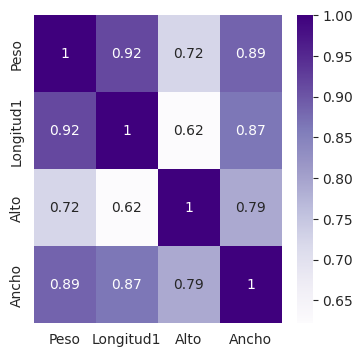

In [ ]:
# Gráfico de correlación
plt.figure(figsize=(4,4))
sns.heatmap(data0.corr(), cmap='Purples', annot=True)

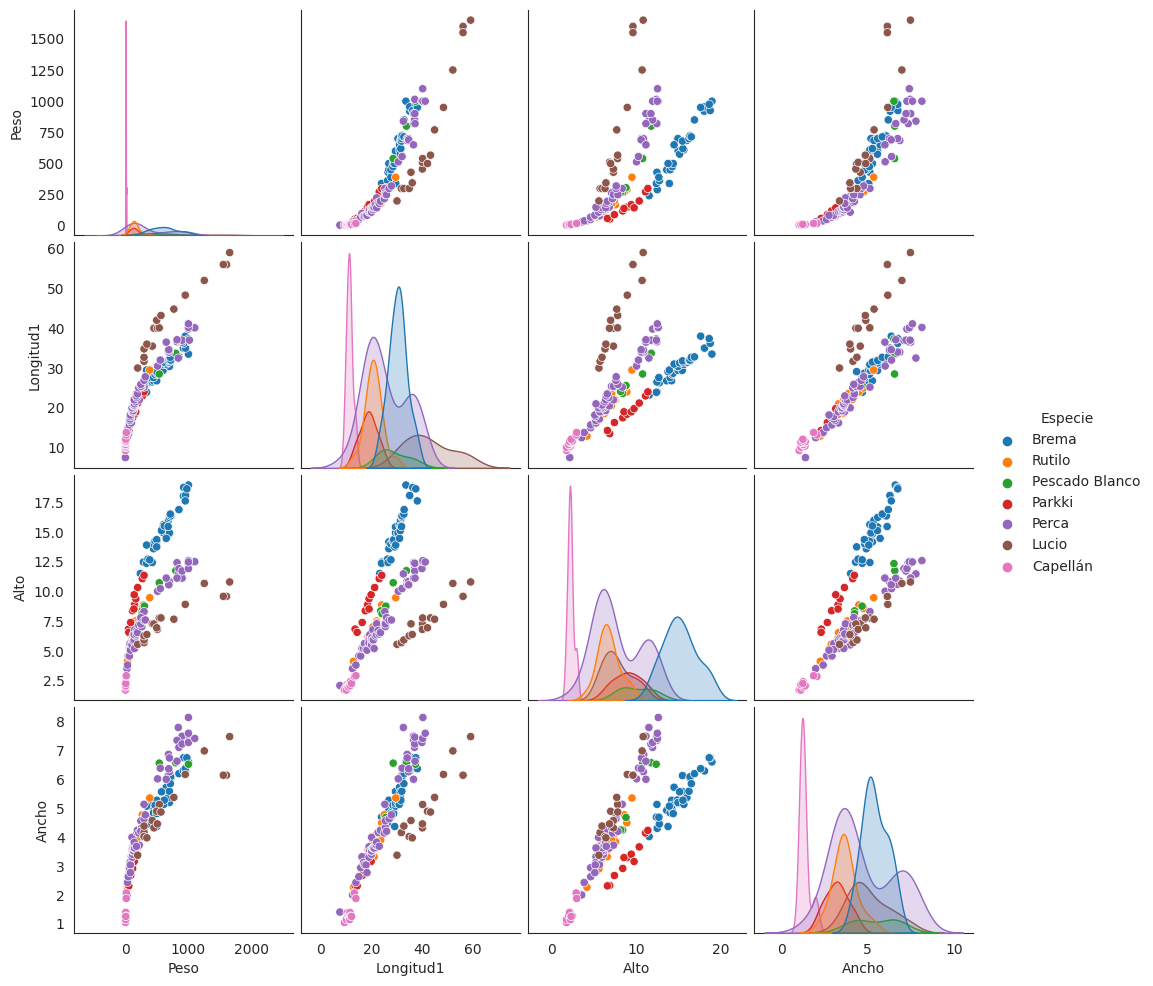

In [ ]:
# Diagrama de nube diferenciando por especie
sns.pairplot(data0, kind='scatter', hue='Especie')

### Modelos de Regresión

In [ ]:
# Modelo 1
modelo01=smf.ols('Peso~Longitud1', data=data0).fit()
print(modelo01.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     805.7
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.78e-63
Time:                        00:06:24   Log-Likelihood:                -1000.7
No. Observations:                 157   AIC:                             2005.
Df Residuals:                     155   BIC:                             2012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -455.1053     32.091    -14.182      0.0

In [ ]:
# Modelo 2. Informe de Regresión
modelo2=smf.ols('Peso~Alto', data=data0).fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     170.2
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.00e-26
Time:                        00:10:22   Log-Likelihood:                -1085.8
No. Observations:                 157   AIC:                             2176.
Df Residuals:                     155   BIC:                             2182.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -138.2811     45.424     -3.044      0.0

In [ ]:
# Modelo 3. Informe de Regresión
modelo03=smf.ols('Peso~Ancho', data=data0).fit()
print(modelo03.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     561.9
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.05e-53
Time:                        00:11:43   Log-Likelihood:                -1023.7
No. Observations:                 157   AIC:                             2051.
Df Residuals:                     155   BIC:                             2058.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -425.5484     37.100    -11.470      0.0


**(1) De las variables consideradas, ¿cuál presenta una mejor relación lineal con el peso?**

**Respuesta:** El modelo01 presenta un mejor valor de R-ajustado y un valor de p más pequeño, por lo tanto, la variable Longitud1 presenta una mejor relación lineal con la variable peso. 

**(2) ¿Cuál es el cambio en el peso corporal por cada incremento de 5 unidades en el mejor predictor?**

Nuestra recta de regresión ajustada asociada al modelo01 es:

$$y=\beta_0+\beta_1*x$$
$$Peso=-455.1053+32.4850*Longitud1$$

**Respuesta:** Por cada incremento de 5 unidades de medida en la Longitud1, el peso aumenta en 32.4850*5 unidades.

**(c) ¿Qué puede comentar sobre las condiciones de normalidad, homocedasticidad de los residuos del modelo seleccionado?**

In [ ]:
# Generamos una nueva  data
data1=data[['Peso', 'Longitud1']]

In [ ]:
data1.head()

,Peso,Longitud1
0,242.0,23.2
1,290.0,24.0
2,340.0,23.9
3,363.0,26.3
4,430.0,26.5


In [ ]:
# Valores predichos con el modelo
peso_modelo01=modelo01.predict()
data1['Peso_predicho']=peso_modelo01


# Residuos del modelo
Residuos_modelo01=modelo01.resid
data1['Residuos']=Residuos_modelo01


In [ ]:
data1.head()

,Peso,Longitud1,Peso_predicho,Residuos
0,242.0,23.2,298.546204,-56.546204
1,290.0,24.0,324.534186,-34.534186
2,340.0,23.9,321.285688,18.714312
3,363.0,26.3,399.249635,-36.249635
4,430.0,26.5,405.746631,24.253369


<function matplotlib.pyplot.show(close=None, block=None)>

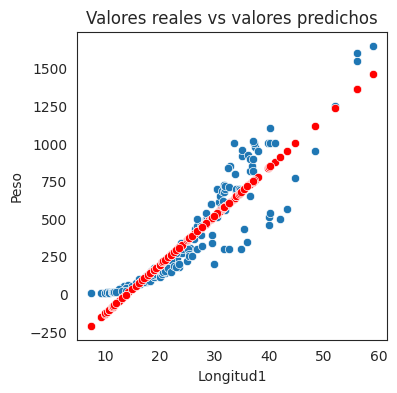

In [ ]:
# Gráfica (valores reales vs valores predichos)
plt.figure(figsize=(4,4))
sns.scatterplot(data=data1, x='Longitud1', y='Peso')
sns.scatterplot(data=data1, x='Longitud1', y='Peso_predicho', color='red')
plt.title('Valores reales vs valores predichos')
plt.show

Text(0.5, 1.0, 'Histograma de residuos')

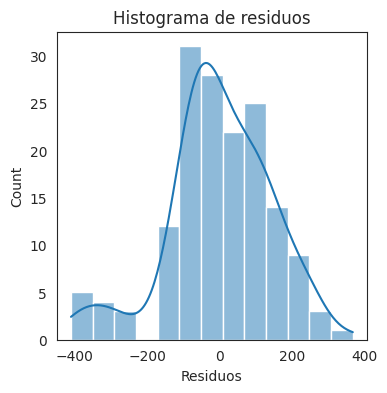

In [ ]:
# Gráfica de los residuos
plt.figure(figsize=(4,4))
sns.histplot(data=data1, x='Residuos', kde=True)
plt.title('Histograma de residuos')

### **Pruebas de Normalidad de los Residuos**

**1) Basados en el gráfico**


> Histograma

> Q-Q Plot


**2) Test de hipótesis** 

El test de normalidad dependerá del tamaño de los datos. Los casos son:

- Caso 1: Si el n > 60 ---> Kolmogorov - Smirnov. 
- Caso 2: Si el n < 60 ---> Shapiro Wilk

- H0: Los residuos se distribuyen de forma normal.
- H1: Los residuos NO se distribuyen de forma normal. 

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

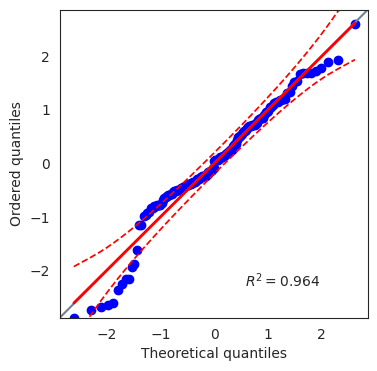

In [ ]:
# Q-Q Plot
plt.figure(figsize=(4,4))
pg.qqplot(Residuos_modelo01)

In [ ]:
# Ajuste para la distribución normal (distfit)
from distfit import distfit
dist=distfit(distr='norm')
dist.fit_transform(Residuos_modelo01)

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm] [0.00 sec] [RSS: 2.80738e-06] [loc=-0.000 scale=141.908]
[distfit] >INFO> Compute confidence intervals [parametric]


{'model': {'name': 'norm',
  'score': 2.8073758916320152e-06,
  'loc': -3.417846331503361e-13,
  'scale': 141.90817617290622,
  'arg': (),
  'params': (-3.417846331503361e-13, 141.90817617290622),
  'model': <scipy.stats._distn_infrastructure.rv_continuous_frozen at 0x7fe1d3d846a0>,
  'bootstrap_score': 0,
  'bootstrap_pass': None,
  'color': '#e41a1c',
  'CII_min_alpha': -233.41817827207373,
  'CII_max_alpha': 233.41817827207294},
 'summary':    name     score  loc       scale arg  \
 0  norm  0.000003 -0.0  141.908176  ()   
 
                                          params  \
 0  (-3.417846331503361e-13, 141.90817617290622)   
 
                                                model bootstrap_score  \
 0  <scipy.stats._distn_infrastructure.rv_continuo...               0   
 
   bootstrap_pass    color  
 0           None  #e41a1c  ,
 'histdata': (array([0.00053344, 0.00042675, 0.00032006, 0.        , 0.00128025,
         0.00330731, 0.00298725, 0.00234712, 0.00266719, 0.00149362,
  

[distfit] >INFO> Create pdf plot for the parametric method.
[distfit] >INFO> Estimated distribution: Norm(loc:-0.000000, scale:141.908176)


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '\nnorm(loc=-3.41785e-13, scale=141.908)'}, xlabel='Values', ylabel='Frequency'>)

<Figure size 500x500 with 0 Axes>

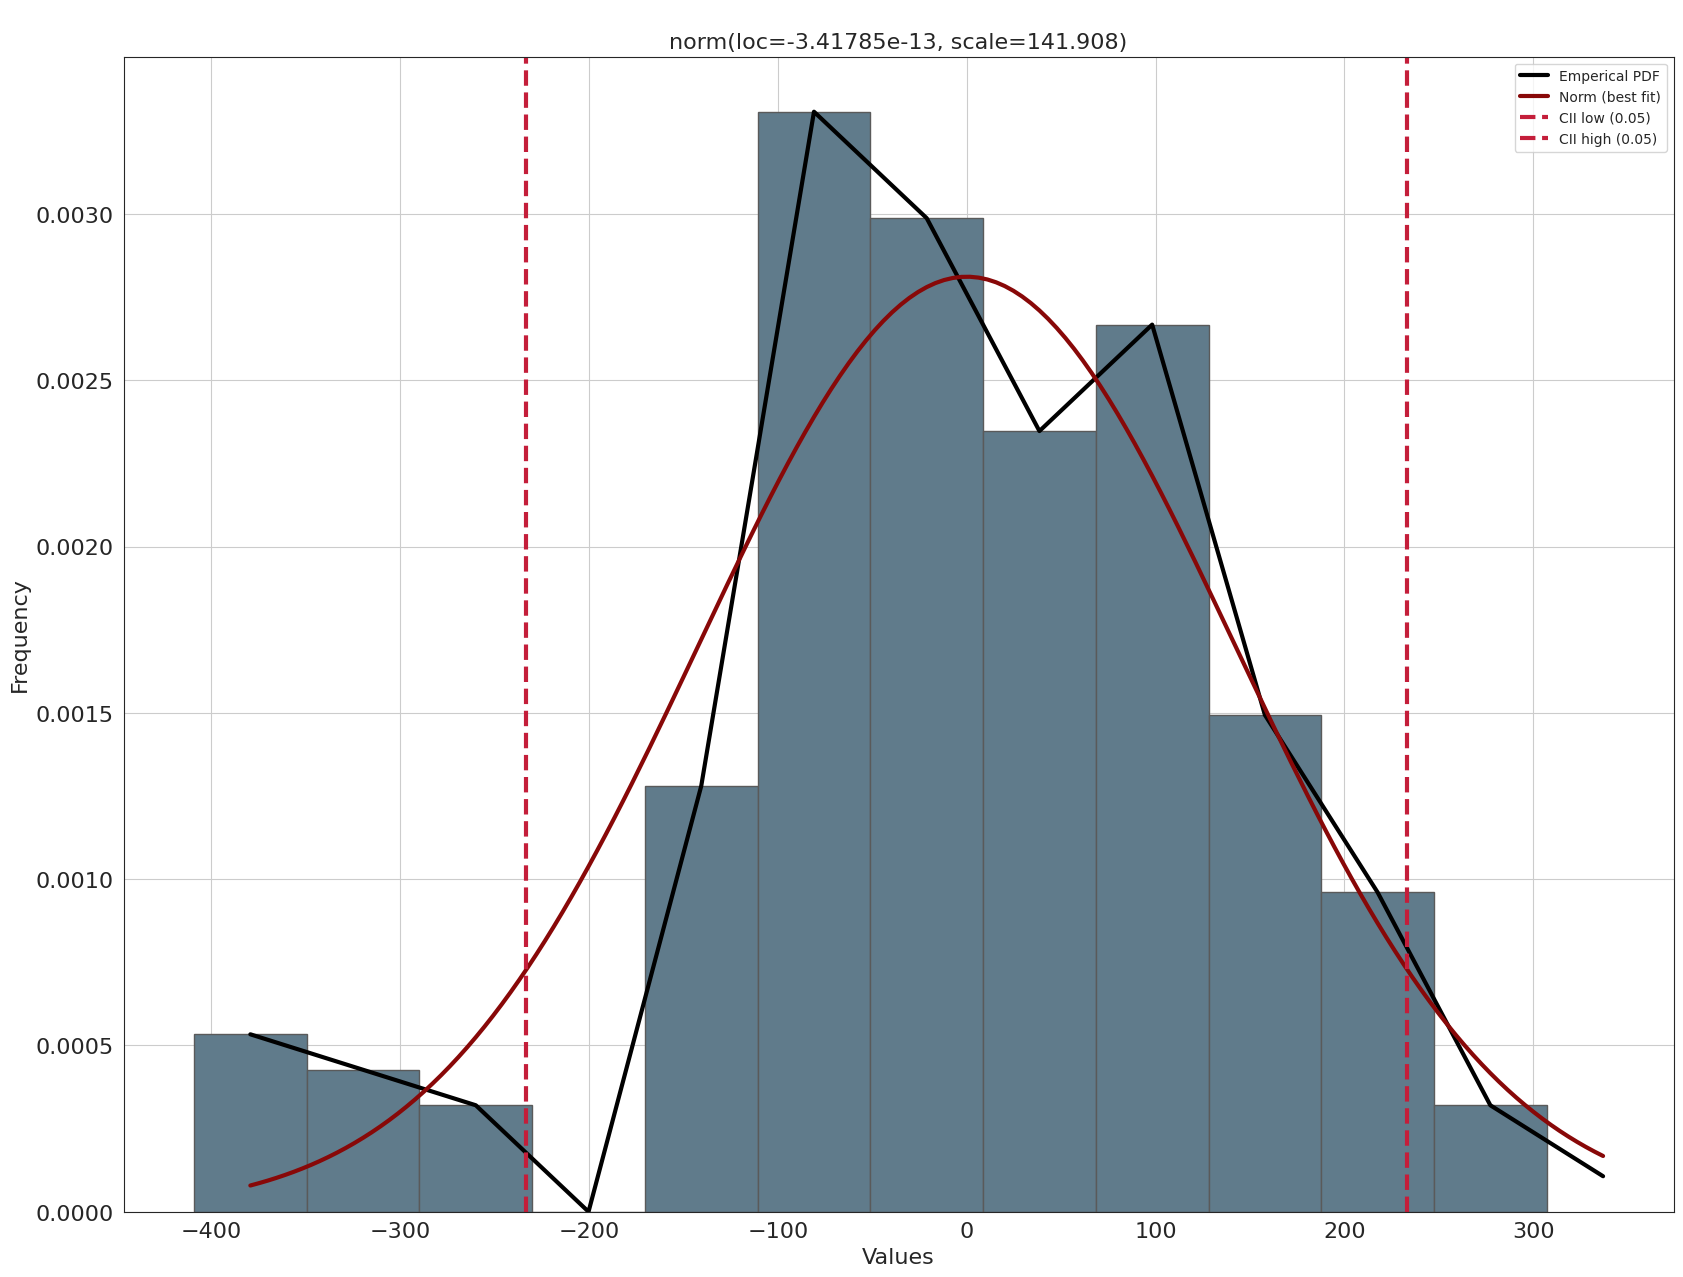

In [ ]:
# Gŕafico ajuste
plt.figure(figsize=(5,5))
dist.plot()

### Test de hipótesis de normalidad de los residuos:

In [ ]:
# Test de normalidad Kolmogorov - Smirnov.
ss.kstest(Residuos_modelo01, 'norm')

KstestResult(statistic=0.5031847133576125, pvalue=2.566525247708245e-37, statistic_location=6.618169659539774, statistic_sign=-1)

**Respuesta:** como el p_valor=2.566525247708245e-37 es menor a alpha=0.05, se rechaza H0. Por lo tanto, no existe evidencia que indique que los residuos se comporten de forma normal.

In [ ]:
# Test de normalidad Shapiro-Wilk
ss.shapiro(Residuos_modelo01)

ShapiroResult(statistic=0.9644285440444946, pvalue=0.0004552309401333332)

In [ ]:
# Test de normalidad de D'agostino
ss.normaltest(Residuos_modelo01)

NormaltestResult(statistic=9.299832562071748, pvalue=0.009562402451461444)

In [ ]:
print(modelo01.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     805.7
Date:                Thu, 18 May 2023   Prob (F-statistic):           2.78e-63
Time:                        01:14:43   Log-Likelihood:                -1000.7
No. Observations:                 157   AIC:                             2005.
Df Residuals:                     155   BIC:                             2012.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -455.1053     32.091    -14.182      0.0

### Homocedasticidad - Heterocedasticidad

Un modelo predictivo presenta **homocedasticidad** cuando la varianza de los residuos es constante.

Si la varianza de los residuos no es constante, el modelo presenta **heterocedasticidad**.

**Test de hipótesis**

*   Test de Breusch - Pagan 

*   H0: Los residuos tienen varianza constante.

*   H1: Los residuos NO tienen varianza constante.

<function matplotlib.pyplot.show(close=None, block=None)>

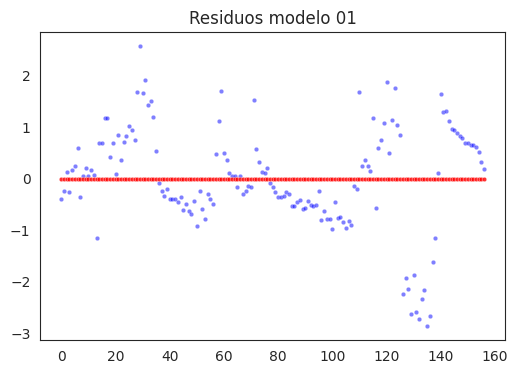

In [ ]:
# Gráfica de los residuos del modelo
plt.figure(figsize=(6,4))
sns.scatterplot(x=np.arange(len(data1)), y=modelo01.resid_pearson, color='blue', s=10, alpha=0.5)
sns.scatterplot(x=np.arange(len(data1)), y=0, color='red', s=10, alpha=0.8)
plt.title('Residuos modelo 01')
plt.show


In [ ]:
## Test de Breusch-Pagan
import statsmodels.stats.api as sms


In [ ]:
stats, p_valor, f_stats, f_pvalue=sms.het_breuschpagan(Residuos_modelo01, modelo01.model.exog)
p_valor

1.9572110922006567e-09

**Respuesta:** como el p_valor=1.9572110922006567e-09 es menor a alpha=0.05 se rechaza H0 . Por lo tanto, los residuos no tienen varianza constante.

In [ ]:
## test de white
from statsmodels.stats.diagnostic import het_white

In [ ]:
stats, p_valor, f_stats, f_pvalue=het_white(Residuos_modelo01, modelo01.model.exog)
p_valor

1.2688501612180058e-08

### Crear un modelo de regresión múltiple considerando al menos dos variables

In [ ]:
# Nueva data
data2=data.copy()
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 160
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Especie    157 non-null    object 
 1   Peso       157 non-null    float64
 2   Longitud1  157 non-null    float64
 3   Longitud2  157 non-null    float64
 4   Longitud3  157 non-null    float64
 5   Alto       157 non-null    float64
 6   Ancho      157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [ ]:
# Modelo 04
modelo04=smf.ols('Peso~Longitud1+Longitud2+Longitud3+Alto+Ancho', data=data2).fit()
print(modelo04.summary()) # Informe del modelo de regresión

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     232.8
Date:                Thu, 18 May 2023   Prob (F-statistic):           4.51e-69
Time:                        01:32:03   Log-Likelihood:                -974.03
No. Observations:                 157   AIC:                             1960.
Df Residuals:                     151   BIC:                             1978.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -494.5704     29.410    -16.816      0.0

In [ ]:
# Modelo 05
data5=data[['Peso', 'Longitud2', 'Ancho']]
data5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 0 to 160
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Peso       157 non-null    float64
 1   Longitud2  157 non-null    float64
 2   Ancho      157 non-null    float64
dtypes: float64(3)
memory usage: 4.9 KB


In [ ]:
#Modelo 05
modelo05=smf.ols('Peso~Longitud2+Ancho', data=data5).fit()
print(modelo05.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     533.0
Date:                Thu, 18 May 2023   Prob (F-statistic):           6.18e-70
Time:                        01:50:58   Log-Likelihood:                -981.47
No. Observations:                 157   AIC:                             1969.
Df Residuals:                     154   BIC:                             1978.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -504.9517     29.433    -17.156      0.0

<Axes: >

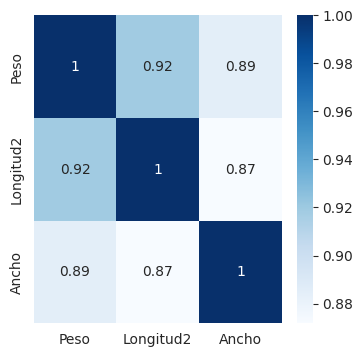

In [ ]:
plt.figure(figsize=(4,4))
sns.heatmap(data5.corr(), cmap='Blues', annot=True)

In [ ]:
Residuos_modelo05=modelo05.resid
data5['Residuos']=Residuos_modelo05
data5

,Peso,Longitud2,Ancho,Residuos
0,242.0,25.4,4.0200,-65.253496
1,290.0,26.3,4.3056,-56.628974
2,340.0,26.5,4.6961,-39.585907
3,363.0,29.0,4.4555,-49.431057
4,430.0,29.0,5.1340,-32.653254
...,...,...,...,...
156,12.2,12.2,1.3936,166.805521
157,13.4,12.4,1.2690,173.176006
158,12.2,13.0,1.2558,160.796048
159,19.7,14.3,2.0672,81.896466


<Axes: xlabel='Residuos', ylabel='Count'>

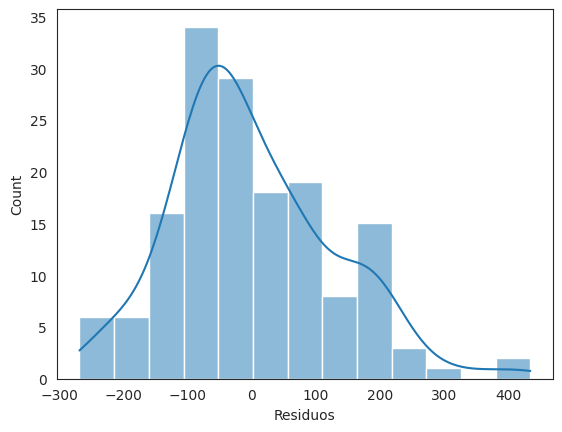

In [ ]:
sns.histplot(data=data5, x='Residuos', kde=True)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

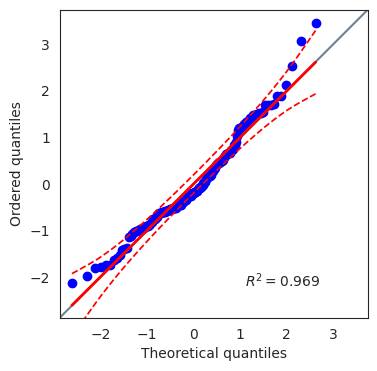

In [ ]:
plt.figure(figsize=(4,4))
pg.qqplot(Residuos_modelo05)

In [ ]:
ss.kstest(Residuos_modelo05, 'norm')

KstestResult(statistic=0.5794974136896104, pvalue=1.4862893648603874e-50, statistic_location=-3.671807135888656, statistic_sign=1)

In [ ]:
data5

,Peso,Longitud2,Ancho,Residuos
0,242.0,25.4,4.0200,-65.253496
1,290.0,26.3,4.3056,-56.628974
2,340.0,26.5,4.6961,-39.585907
3,363.0,29.0,4.4555,-49.431057
4,430.0,29.0,5.1340,-32.653254
...,...,...,...,...
156,12.2,12.2,1.3936,166.805521
157,13.4,12.4,1.2690,173.176006
158,12.2,13.0,1.2558,160.796048
159,19.7,14.3,2.0672,81.896466


In [ ]:
data5.iloc[156]

Peso         19.9000
Longitud2    15.0000
Ancho         1.8792
Name: 160, dtype: float64

In [ ]:
# Modelo 06

In [ ]:
data6=data5[np.abs(data5['Residuos'])<50]
data6.info()              # Estamos eliminando muchas observaciones

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 2 to 141
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Peso       44 non-null     float64
 1   Longitud2  44 non-null     float64
 2   Ancho      44 non-null     float64
 3   Residuos   44 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [ ]:
modelo06=smf.ols('Peso~Longitud2+Ancho', data=data6).fit()
print(modelo06.summary())

                            OLS Regression Results                            
Dep. Variable:                   Peso   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     2230.
Date:                Thu, 18 May 2023   Prob (F-statistic):           1.48e-42
Time:                        01:53:21   Log-Likelihood:                -206.76
No. Observations:                  44   AIC:                             419.5
Df Residuals:                      41   BIC:                             424.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -523.4667     14.176    -36.925      0.0